# Pymaceuticals Inc.
---

### Analysis

- Add your analysis here.
 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
from scipy.stats import linregress

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
combined_data_df = pd.merge(study_results, mouse_metadata, on="Mouse ID")

# Display the data table for preview
combined_data_df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [2]:
# Checking the number of mice.
number_of_mice = combined_data_df['Mouse ID'].nunique()
number_of_mice

249

In [3]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate_counts = combined_data_df.groupby(['Mouse ID', 'Timepoint']).size()

# Filter to get 'Mouse ID' with duplicates based on 'Timepoint'
duplicate_mouse_ids = duplicate_counts[duplicate_counts > 1].reset_index()['Mouse ID'].unique()
duplicate_mouse_ids

array(['g989'], dtype=object)

In [4]:
# Optional: Get all the data for the duplicate mouse ID. 
duplicates = combined_data_df[combined_data_df.duplicated(subset=['Mouse ID', 'Timepoint'], keep=False)]
duplicates

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
107,g989,0,45.000000,0,Propriva,Female,21,26
137,g989,0,45.000000,0,Propriva,Female,21,26
329,g989,5,48.786801,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
620,g989,10,51.745156,0,Propriva,Female,21,26
681,g989,10,49.880528,0,Propriva,Female,21,26
815,g989,15,51.325852,1,Propriva,Female,21,26
869,g989,15,53.442020,0,Propriva,Female,21,26
950,g989,20,55.326122,1,Propriva,Female,21,26
1111,g989,20,54.657650,1,Propriva,Female,21,26


In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
cleaned_data_df = combined_data_df[~combined_data_df['Mouse ID'].isin(duplicate_mouse_ids)]
cleaned_data_df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [6]:
# Checking the number of mice in the clean DataFrame.
number_of_mice_cleaned = cleaned_data_df['Mouse ID'].nunique()
number_of_mice_cleaned

248

## Summary Statistics

In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary DataFrame.
by_drug_df = cleaned_data_df[['Drug Regimen', 'Tumor Volume (mm3)']]
by_drug_summary_df = by_drug_df.groupby('Drug Regimen').mean()
median = by_drug_df.groupby('Drug Regimen').median()
var = by_drug_df.groupby('Drug Regimen').var()
std_dev = by_drug_df.groupby('Drug Regimen').std()
sem = by_drug_df.groupby('Drug Regimen').sem()

by_drug_summary_df = by_drug_summary_df.rename(columns={'Tumor Volume (mm3)':'Mean Tumor Volume'})
by_drug_summary_df['Median Tumor Volume'] = median
by_drug_summary_df['Tumor Volume Variance'] = var
by_drug_summary_df['Tumor Volume Std. Dev.'] = std_dev
by_drug_summary_df['Tumor Volume Std. Err.'] = sem
by_drug_summary_df

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [8]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line
by_drug_df2 = cleaned_data_df[['Drug Regimen', 'Tumor Volume (mm3)']]
by_drug_df2 = by_drug_df2.groupby('Drug Regimen')['Tumor Volume (mm3)'].agg(['mean', 'median', 'var', 'std', 'sem'])
by_drug_df2

,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

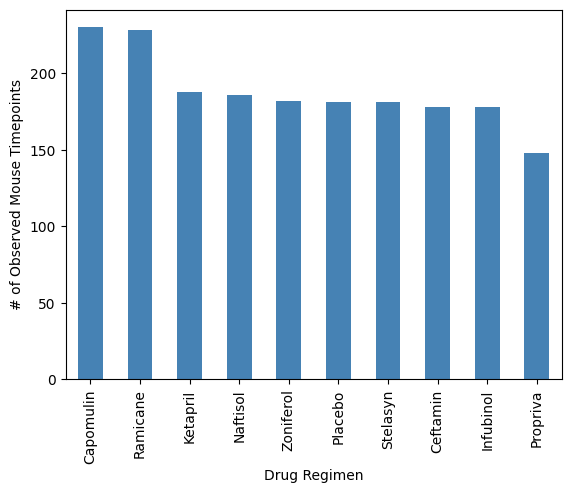

In [9]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
drug_counts = cleaned_data_df.groupby('Drug Regimen').size()
drug_counts_sorted = drug_counts.sort_values(ascending=False)
drug_counts_sorted.plot(kind='bar', color='steelblue', )
plt.xlabel('Drug Regimen')
plt.ylabel('# of Observed Mouse Timepoints')
plt.show()

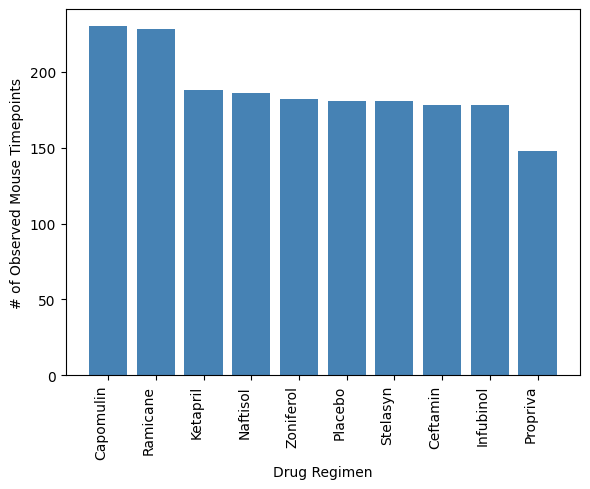

In [10]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
drug_regimens = drug_counts_sorted.index
observation_counts = drug_counts_sorted.values
plt.figure(figsize=(6, 5))
plt.bar(drug_regimens, observation_counts, color='steelblue')
plt.xlabel('Drug Regimen')
plt.ylabel('# of Observed Mouse Timepoints')
plt.xticks(rotation=90, ha='right')
plt.tight_layout()
plt.show()

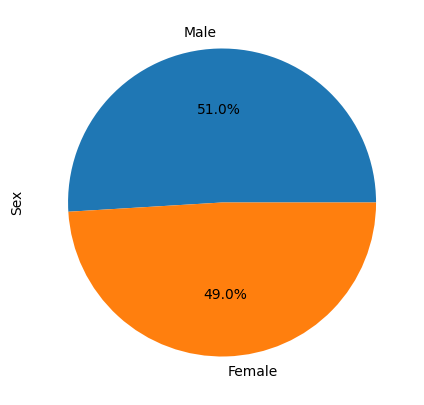

In [11]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
sex_counts = cleaned_data_df.groupby('Sex').size()
sex_counts_sorted = sex_counts.sort_values(ascending=False)
sex_pie = sex_counts_sorted.plot(kind='pie', figsize=(5, 5), autopct='%1.1f%%', startangle=0)
sex_pie.set_ylabel('Sex')
plt.show()

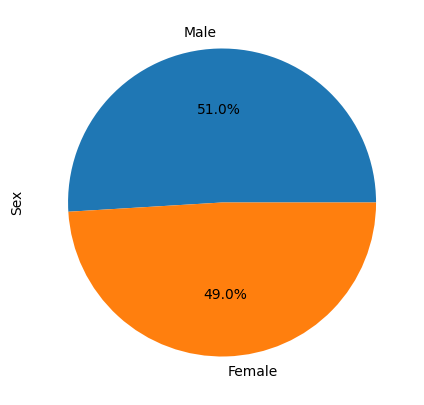

In [12]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
sex_counts = cleaned_data_df['Sex'].value_counts()
sex_counts_sorted = sex_counts.sort_index(ascending=False)
plt.figure(figsize=(5, 5))
plt.pie(sex_counts_sorted, labels=sex_counts_sorted.index, autopct='%1.1f%%', startangle=0)
plt.ylabel('Sex')
plt.show()

## Quartiles, Outliers and Boxplots

In [13]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
last_timepoints_indices_df = study_results.groupby('Mouse ID')['Timepoint'].idxmax()
last_timepoints_df = study_results.loc[last_timepoints_indices_df]
last_timepoints_df.reset_index(drop=True, inplace=True)

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
combined_last_df = pd.merge(last_timepoints_df, mouse_metadata, on="Mouse ID")
combined_last_df

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,a203,45,67.973419,2,Infubinol,Female,20,23
1,a251,45,65.525743,1,Infubinol,Female,21,25
2,a262,45,70.717621,4,Placebo,Female,17,29
3,a275,45,62.999356,3,Ceftamin,Female,20,28
4,a366,30,63.440686,1,Stelasyn,Female,16,29
...,...,...,...,...,...,...,...,...
244,z435,10,48.710661,0,Propriva,Female,12,26
245,z578,45,30.638696,0,Ramicane,Male,11,16
246,z581,45,62.754451,3,Infubinol,Female,24,25
247,z795,45,65.741070,3,Naftisol,Female,13,29


In [14]:
# Put treatments into a list for for loop (and later for plot labels)
capomulin_df = combined_last_df[(combined_last_df['Drug Regimen'] == 'Capomulin')]
capomulin_df = capomulin_df[['Tumor Volume (mm3)']]
ramicane_df = combined_last_df[(combined_last_df['Drug Regimen'] == 'Ramicane')]
ramicane_df = ramicane_df[['Tumor Volume (mm3)']]
infubinol_df = combined_last_df[(combined_last_df['Drug Regimen'] == 'Infubinol')]
infubinol_df = infubinol_df[['Tumor Volume (mm3)']]
ceftamin_df = combined_last_df[(combined_last_df['Drug Regimen'] == 'Ceftamin')]
ceftamin_df = ceftamin_df[['Tumor Volume (mm3)']]

# Create empty list to fill with tumor vol data (for plotting)
drug_regimens = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']
tumor_volume_data = []

for drug in drug_regimens:
    series = combined_last_df[combined_last_df['Drug Regimen'] == drug]['Tumor Volume (mm3)']
    tumor_volume_data.append(series)

capomulin_series = combined_last_df[combined_last_df['Drug Regimen'] == 'Capomulin']['Tumor Volume (mm3)']
ramicane_series = combined_last_df[combined_last_df['Drug Regimen'] == 'Ramicane']['Tumor Volume (mm3)']
infubinol_series = combined_last_df[combined_last_df['Drug Regimen'] == 'Infubinol']['Tumor Volume (mm3)']
ceftamin_series = combined_last_df[combined_last_df['Drug Regimen'] == 'Ceftamin']['Tumor Volume (mm3)']

# Calculate the IQR and quantitatively determine if there are any potential outliers.
def calculate_iqr_bounds(dataframe, column_name):
    data = dataframe[column_name]
    quartiles = data.quantile([.25, .5, .75])
    iqr = quartiles[0.75] - quartiles[0.25]
    lower_bound = quartiles[0.25] - (1.5 * iqr)
    upper_bound = quartiles[0.75] + (1.5 * iqr)
    return quartiles, iqr, lower_bound, upper_bound

#     # Locate the rows which contain mice on each drug and get the tumor volumes

    
#     # add subset 

    
# Determine outliers using upper and lower bounds
def find_outliers_series(dataframe, column_name, lower_bound, upper_bound):
    outliers = dataframe[(dataframe[column_name] < lower_bound) | (dataframe[column_name] > upper_bound)][column_name]
    return outliers


# Calculate for Capomulin
capomulin_quartiles, capomulin_iqr, capomulin_lb, capomulin_ub = calculate_iqr_bounds(capomulin_df, 'Tumor Volume (mm3)')
capomulin_outliers = find_outliers_series(capomulin_df, 'Tumor Volume (mm3)', capomulin_lb, capomulin_ub)

# Calculate for Ramicane
ramicane_quartiles, ramicane_iqr, ramicane_lb, ramicane_ub = calculate_iqr_bounds(ramicane_df, 'Tumor Volume (mm3)')
ramicane_outliers = find_outliers_series(ramicane_df, 'Tumor Volume (mm3)', ramicane_lb, ramicane_ub)

# Calculate for Infubinol
infubinol_quartiles, infubinol_iqr, infubinol_lb, infubinol_ub = calculate_iqr_bounds(infubinol_df, 'Tumor Volume (mm3)')
infubinol_outliers = find_outliers_series(infubinol_df, 'Tumor Volume (mm3)', infubinol_lb, infubinol_ub)

# Calculate for Ceftamin
ceftamin_quartiles, ceftamin_iqr, ceftamin_lb, ceftamin_ub = calculate_iqr_bounds(ceftamin_df, 'Tumor Volume (mm3)')
ceftamin_outliers = find_outliers_series(ceftamin_df, 'Tumor Volume (mm3)', ceftamin_lb, ceftamin_ub)

# Display outliers
print("Capomulin's potential outliers: ", capomulin_outliers)
print("Ramicane's potential outliers: ", ramicane_outliers)
print("Infubinol's potential outliers: ", infubinol_outliers)
print("Ceftamin's potential outliers: ", ceftamin_outliers)

Capomulin's potential outliers:  Series([], Name: Tumor Volume (mm3), dtype: float64)
Ramicane's potential outliers:  Series([], Name: Tumor Volume (mm3), dtype: float64)
Infubinol's potential outliers:  31    36.321346
Name: Tumor Volume (mm3), dtype: float64
Ceftamin's potential outliers:  Series([], Name: Tumor Volume (mm3), dtype: float64)


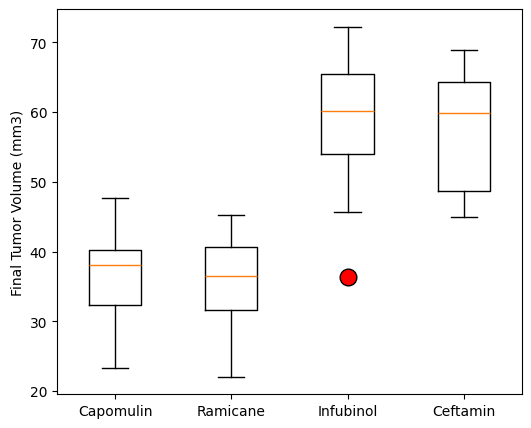

In [15]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.

# Create a box plot
fig, ax = plt.subplots(figsize=(6, 5))

# Create a dictionary for box plot
data_to_plot = [combined_last_df[combined_last_df['Drug Regimen'] == drug]['Tumor Volume (mm3)'] for drug in drug_regimens]

# Define flier properties for the outliers
flierprops = dict(marker='o', color='r', markerfacecolor='r', markersize=12)

# Plot the box plot
ax.boxplot(data_to_plot, tick_labels=drug_regimens, flierprops=flierprops)

# Customize the box plot
ax.set_ylabel('Final Tumor Volume (mm3)')

# Display the box plot
plt.show()

## Line and Scatter Plots

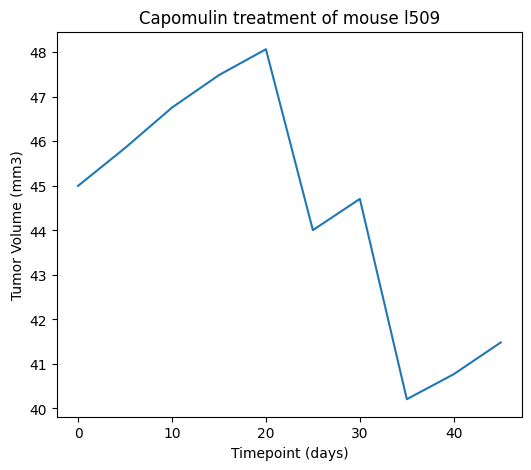

In [16]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
mouse_ID = 'l509'
drug_selected = 'Capomulin'
single_mouse_df = cleaned_data_df.loc[(cleaned_data_df['Mouse ID'] == mouse_ID) & (cleaned_data_df['Drug Regimen'] == drug_selected)]

plt.figure(figsize=(6, 5))
plt.plot(single_mouse_df['Timepoint'], single_mouse_df['Tumor Volume (mm3)'], linestyle='-')
plt.title(f'{drug_selected} treatment of mouse {mouse_ID}')
plt.xlabel('Timepoint (days)')
plt.ylabel('Tumor Volume (mm3)')
plt.show()

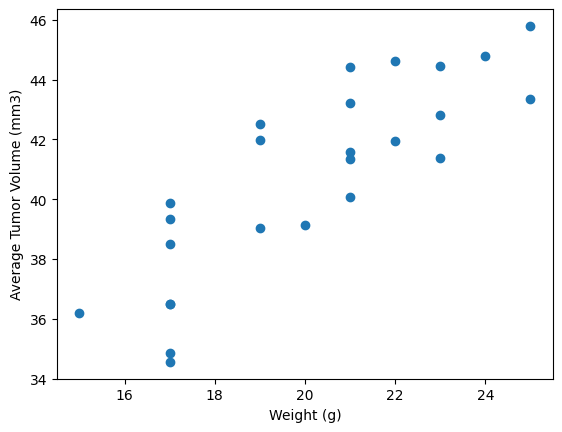

In [17]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
drug_selected = 'Capomulin'
drug_mass_df = cleaned_data_df.loc[cleaned_data_df['Drug Regimen'] == drug_selected]
drug_mass_df = drug_mass_df[['Mouse ID', 'Timepoint', 'Weight (g)', 'Tumor Volume (mm3)']]
average_tumor_df = drug_mass_df.groupby('Mouse ID').mean()

plt.scatter(average_tumor_df['Weight (g)'], average_tumor_df['Tumor Volume (mm3)'])
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.show()

## Correlation and Regression

The correlation between mouse weight and the average tumor volume is 0.84


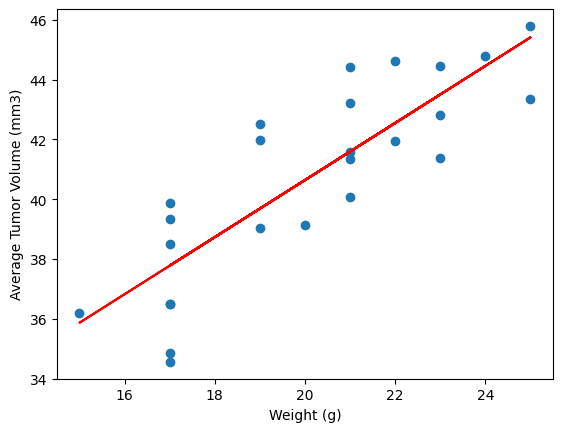

In [18]:
# Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen
# Add the linear regression equation and line to plot
x_values = average_tumor_df['Weight (g)']
y_values = average_tumor_df['Tumor Volume (mm3)']

# Perform the linear regression and populates all the values for the line of best fit (needed to import linregress from scipy.stats
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
print(f'The correlation between mouse weight and the average tumor volume is {round(rvalue,2)}')
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.show()